# Transmission dynamics of interesting SNVs 

**Author**: Katarina Braun 

## Overview
- This script will plot SNVs over time in the index and then contact ferret 
- These plots will include SNVs that are of interest and/or are highlighted in the paper 
    - interesting dynamics over time 
    - known mammalian-adaptive variants 

**Visualize**: 
Two line plots, one for SNV dynamics in the index and one for SNV dynamics in the contact. 
- x: SNV frequency 
- y: time 

### Note about HA numbering: 
For H7N9, I used H7 numbering. This numbering scheme matches the numbering scheme on Nextstrain (https://nextstrain.org/).  
For H1N1pdm, I use H1 numbering. Again, this numbering scheme matches the numbering scheme on Nextstrain. For clarity, I start counting amino acids at nucleotide #51, AA #18 (D). 

**Colors**: (hex codes) 
1. **GD3 and recombinant viruses**: #264653
2. **Anhui**: #2A9D8F
3. **CA04**: #F4A261

## Input: 

This script uses data from VCF files containing SNV frequencies.   
```H7N9-evolution-in-mammals/data_derived/SNVs/*```

## Output: 

This script generates a plot and saves it here:  
```H7N9-evolution-in-mammals/figures/figure3.pdf```

## for ease of use, here is a table with all ferrets, viruses, and timepoints where vRNA was collected

### Index ferrets 

| Ferret ID | Virus | Day 1 | Day 3 | Day 5 | Day 7 |
| - | - | - | - | - | - |
|1|Guangdong/17SF003|x|x|x|x|
|3|Guangdong/17SF003|x|x|x|x|
|5|Guangdong/17SF003|x|x|x|x|
|7|Guangdong/17SF003|x|x|x|x|
|9|R294-Guangdong|x|x|x|x|
|11|R294-Guangdong|x|x|
|13|R294-Guangdong|x|x|x|
|15|R294-Guangdong|x|x|x|x|
|17|K294-Guangdong|x|x|x|x|
|19|K294-Guangdong|x|x|x|
|21|K294-Guangdong|x|x|x|
|23|K294-Guangdong|x|x|x|x|
|25|Anhui1|x|x|x|x|
|27|Anhui1|x|x|x|x|
|29|Anhui1|x|x|x|x|
|31|Anhui1|x|x|x|
|33|CA04|x|x|x|x|
|35|CA04|x|x|x|

### Contact ferrets 

| Ferret ID | Virus | Day 3 | Day 5 | Day 7 | Day 9 | Day 11 | Day 13 | Day 15 |
| - | - | - | - | - | - | -|-|-|
|2|Guangdong/17SF003|
|4|Guangdong/17SF003|-|x|x|x|x|
|6|Guangdong/17SF003|
|8|Guangdong/17SF003|
|10|R294-Guangdong|x|x|x|x|
|12|R294-Guangdong|x|x|
|14|R294-Guangdong|
|16|R294-Guangdong|x|x|x|
|18|K294-Guangdong|-|-|-|-|x|x|x|
|20|K294-Guangdong|
|22|K294-Guangdong|x|x|x|x|
|24|K294-Guangdong|
|26|Anhui1|
|28|Anhui1|x|x|x|
|30|Anhui1|
|32|Anhui1|
|34|CA04|
|36|CA04|x|x|

## import modules and dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns; sns.set()
from matplotlib import pyplot
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from cycler import cycler
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib.patches import ConnectionPatch

/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


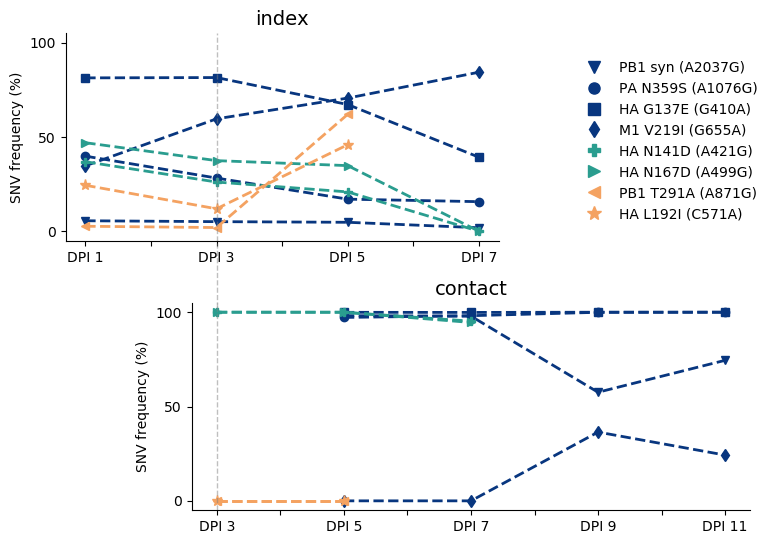

In [12]:
# This function generates an array/matrix from a series of SNV frequencies 
def splitSerToArr(ser):
    return [ser.index, ser.as_matrix()]

# These SNV frequencies are pulled from the VCF files in `data_derived`
xs = range(5)
series1 = [5.57,5.1,4.76,1.87,None] # PB1_A2037G (syn), GD3 pair 2, index ferret 3 
series2 = [39.83,28.21,17.02,15.69,None] # PA_A1076G (N359S), GD3 pair 2, index ferret 3
series3 = [81.31,81.48,67.18,39.25,None] # HA_G410A (G137E), GD3 pair 2, index ferret 3
series4 = [34.68,59.6,70.6,84.32,None] # M1_G655A (V219I), GD3 pair 2, index ferret 3 ** mammalian adapting 
series5 = [36.87,26.1,20.86,0,None] # HA_A421G (N141D), Anhui pair 14, index ferret 27
series6 = [46.95,37.44,34.8,0,None] # HA_A499G (N167D), Anhui pair 14, index ferret 27
series7 = [2.66,1.97,62.0,None,None] # PB1_A871G (T291A), CA04 pair 18, index ferret 35 
series8 = [24.38,11.92,45.89,None,None] # HA_C571A_L191I, CA04 pair 18, index ferret 35

s1 = pd.Series(series1, index=xs)
s2 = pd.Series(series2, index=xs)
s3 = pd.Series(series3, index=xs)
s4 = pd.Series(series4, index=xs)
s5 = pd.Series(series5, index=xs)
s6 = pd.Series(series6, index=xs)
s7 = pd.Series(series7, index=xs)
s8 = pd.Series(series8, index=xs)

# These SNV frequencies are pulled from the VCF files in `data_derived`
xs5 = range(5)
series9 = [None,98.16,97.9,57.57,74.48] # PB1_A2037G (syn), GD3 pair 2, contact ferret 4 
series10 = [None,97.22,98.14,99.94,99.98] # PA_A1076G (N359S), GD3 pair 2, contact ferret 4
series11 = [None,99.94,99.88,99.99,100] # HA_G410A (G137E), GD3 pair 2, contact ferret 4
series12 = [None,0,0,36.45,24.26] # M1_G655A (V219I), GD3 pair 2, contact ferret 4 ** mammalian adapting 
series13 = [99.98,99.96,95.25,None,None] # HA_A421G (N141D), Anhui pair 14,  contact ferret 28
series14 = [100.0,99.99,94.55,None,None] # HA_A499G (N167D), Anhui pair 14, contact ferret 28
series15 = [0,0,None,None,None] # PB1_A871G (T291A), CA04 pair 18, contact ferret 36 
series16 = [0,0,None,None,None] # HA_C571A_L191I, CA04 pair 18, contact ferret 36

s9 = pd.Series(series9, index=xs5)
s10 = pd.Series(series10, index=xs5)
s11 = pd.Series(series11, index=xs5)
s12 = pd.Series(series12, index=xs5)
s13 = pd.Series(series13, index=xs5)
s14 = pd.Series(series14, index=xs5)
s15 = pd.Series(series15, index=xs5)
s16 = pd.Series(series16, index=xs5)

# define hex colors
GD3 = '#08367F'
Anhui = '#2A9D8F'
CA04 = '#F4A261'

# generate a figure with sub-plots (one for each gene segment)
fig3 = plt.figure(figsize=(14,8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Helvetica')
gs = gridspec.GridSpec(3, 11)

ax1 = fig3.add_subplot(gs[0,0:4]) #index
ax2 = fig3.add_subplot(gs[1,1:6]) #contact

# get right of top and right frame of each subplot
axes = (ax1, ax2)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    
# set fontsize of axes 
ax = plt.gca()
for ax in axes: 
    ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 10)

# edit the axes - ax1
ax1.set_title('index', fontname='Helvetica', fontsize=14)
ax1.set_ylabel('SNV frequency (%)', fontname='Helvetica', fontsize=10)
ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Helvetica")
ax1.set_ylim(-5,105)
ax1.set_yticks([0,50,100])
ax1.set_xticklabels(['', 'DPI 1', '', 'DPI 3', '', 'DPI 5', '', 'DPI 7'], fontname='Helvetica', fontsize='10', minor=False)


# edit the axes - ax2
ax2.set_title('contact', fontname='Helvetica', fontsize=14)
ax2.set_ylabel('SNV frequency (%)', fontname='Helvetica', fontsize=10)
ax2.set_facecolor('white')
for tick in ax2.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Helvetica")
ax2.set_ylim(-5,105)
ax2.set_yticks([0,50,100])
ax2.set_xticklabels(['', 'DPI 3', '', 'DPI 5', '', 'DPI 7', '', 'DPI 9', '', 'DPI 11'], fontname='Helvetica', fontsize='10', minor=False)

# plot index SNVs
ax1.plot( *splitSerToArr(s1.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='v', markersize=6, color='#08367F', label='PB1_A2037G (syn)')
ax1.plot( *splitSerToArr(s2.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='o', markersize=6, color='#08367F', label='PA_A1076G (N359S)')
ax1.plot( *splitSerToArr(s3.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='s', markersize=6, color='#08367F', label='HA_G410A (G137E)')
ax1.plot( *splitSerToArr(s4.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='d', markersize=6, color='#08367F', label='M1_G655A (V219I)')
ax1.plot( *splitSerToArr(s5.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='P', markersize=6, color='#2A9D8F', label='HA_A421G (N141D)')
ax1.plot( *splitSerToArr(s6.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='>', markersize=6, color='#2A9D8F', label='HA_A499G (N167D)')
ax1.plot( *splitSerToArr(s7.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='<', markersize=6, color='#F4A261', label='PB1_A871G (T291A)')
ax1.plot( *splitSerToArr(s8.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='*', markersize=8, color='#F4A261', label='HA_C571A (L191I)')

# plot contact SNVs
ax2.plot( *splitSerToArr(s9.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='v', markersize=6, color='#08367F', label='PB1_A2037G (syn)')
ax2.plot( *splitSerToArr(s10.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='o', markersize=6, color='#08367F', label='PA_A1076G (N359S)')
ax2.plot( *splitSerToArr(s11.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='s', markersize=6, color='#08367F', label='HA_G410A (G137E)')
ax2.plot( *splitSerToArr(s12.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='d', markersize=6, color='#08367F', label='M1_G655A (V219I)')
ax2.plot( *splitSerToArr(s13.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='P', markersize=6, color='#2A9D8F', label='HA_A421G (N141D)')
ax2.plot( *splitSerToArr(s14.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='>', markersize=6, color='#2A9D8F', label='HA_A499G (N167D)')
ax2.plot( *splitSerToArr(s15.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='<', markersize=6, color='#F4A261', label='PB1_A871G (T291A)')
ax2.plot( *splitSerToArr(s16.dropna()), linestyle='dashed', linewidth=2, alpha=1, marker='*', markersize=8, color='#F4A261', label='HA_C571A (L191I)')

# draw a faint vertical line to illustrate shared days post infection in index and contact plots
ax1.axvline(x=1,color='gray',linestyle='--', linewidth=1, alpha=0.5)
ax2.axvline(x=0,color='gray',linestyle='--', linewidth=1, alpha=0.5)
# this is the connect lined between the vertical lines in each subplot
line = plt.Line2D([0.1585,0.1585],[0.61,0.69],color='grey',linestyle='--', linewidth=1, alpha=0.5) # [x1,x2], [y1,y2]
fig3.add_artist(line)

# add a legend to this plot
PB1_A2037G = mlines.Line2D([], [], marker='v', color=GD3, linestyle='None', markersize=8, label='PB1 syn (A2037G)')
PA_A1076G = mlines.Line2D([], [], marker='o', color=GD3, linestyle='None', markersize=8, label='PA N359S (A1076G)')
HA_G410A = mlines.Line2D([], [], marker='s', color=GD3, linestyle='None', markersize=8, label='HA G137E (G410A)')
M1_G655A = mlines.Line2D([], [], marker='d', color=GD3, linestyle='None', markersize=8, label='M1 V219I (G655A)')
HA_A421G = mlines.Line2D([], [], marker='P', color=Anhui, linestyle='None', markersize=8, label='HA N141D (A421G)')
HA_A499G = mlines.Line2D([], [], marker='>', color=Anhui, linestyle='None', markersize=8, label='HA N167D (A499G)')
PB1_A871G = mlines.Line2D([], [], marker='<', color=CA04, linestyle='None', markersize=8, label='PB1 T291A (A871G)')
HA_C571A = mlines.Line2D([], [], marker='*', color=CA04, linestyle='None', markersize=10, label='HA L192I (C571A)')
fig3.legend(handles=[PB1_A2037G, PA_A1076G, HA_G410A, M1_G655A, HA_A421G, HA_A499G, PB1_A871G, HA_C571A], frameon=False, fontsize=10, bbox_to_anchor=(0.55,0.62))

# use tight_layout to optimize spacing of axes and titles within each subplot
fig3.tight_layout()
fig3.show()

# save this plot to the figures folder 
fig3.savefig("../figures/figure3.pdf", bbox_inches='tight', dpi=300)


###